# Introduction to Linear regression in Python

Notes by César Muro.

Response variable is the dependent variable.  
Explanatory variable is the independent variable.  

Linear regression: The response variable is numeric.  
Logistic regression: The response variable is logical.  
Simple linear/logistic regression: There is only one explanatory variable.  

To visualize the relation between two numeric variables a scatter plot is employed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url= "https://raw.githubusercontent.com/abnr/ml-data/main/taiwan_real_estate2.csv"
taiwan_real_estate=pd.read_csv(url,index_col=0) 

In [3]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 414 entries, 84.87882 to 90.45606
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   n_convenience    414 non-null    int64  
 1   house_age_years  414 non-null    object 
 2   price_twd_msq    414 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.9+ KB


In [4]:
taiwan_real_estate.describe()

,n_convenience,price_twd_msq
count,414.000000,414.000000
mean,4.094203,11.491738
std,2.945562,4.116940
min,0.000000,2.299546
25%,1.000000,8.381241
50%,4.000000,11.633888
75%,6.000000,14.099849
max,10.000000,35.552194


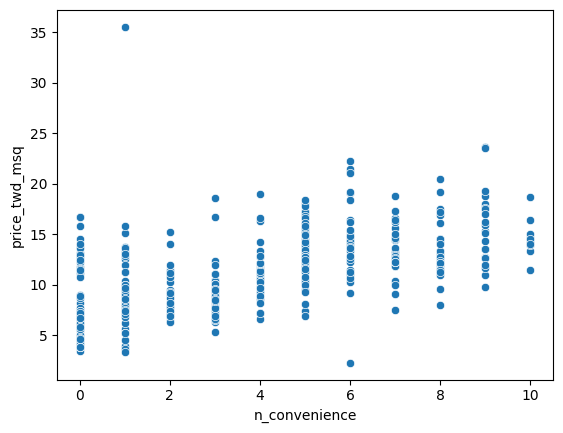

In [5]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",y="price_twd_msq",data=taiwan_real_estate)

# Show the plot
plt.show()

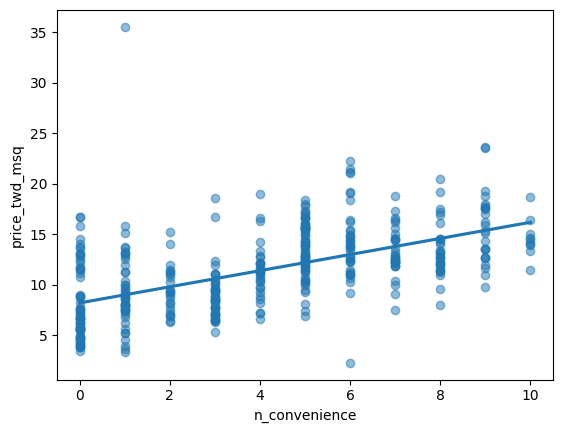

In [6]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(y="price_twd_msq",
         x="n_convenience",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Fitting a linear regresion
The equation of a line is $y=m*x+b$ where $m$ is the slope and $b$ the intercept at the origin.  
In Python, 
from statsmodels.formula.api import ols  
lin_model=ols("y~x",data=)  
lin_model=lin_model.fit()

In [7]:
# Import the ols function
from statsmodels.formula.api import ols 

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq~n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv =mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Categorical explanatory variable

The explanatory variable is categorical. In case of a simple categorical variable the coefficients are the means.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

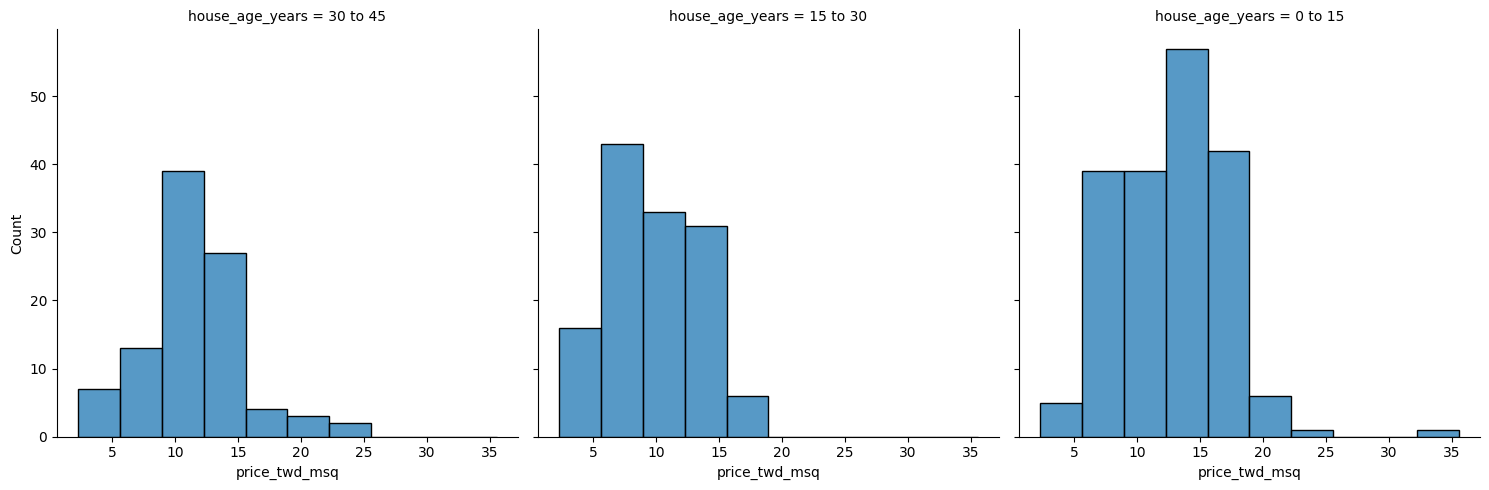

In [8]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years+0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Making predictions
Models let you make predictions. The linear model gives a function of a line that for each value of the explanatory value whe have one for the response variable. You can save explanatory variable in a dataframe exp_data and then use the function predict()	in the way: model.predict(exp_data). You can also use assign() function as predict_data=exp_data.assign(model.predict(exp_data)).  
Then, include that predict data on a scatter plot together with the data and the linear fit.

Predicting house prices  

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable.  
Make predictions for the house prices in the Taiwan real estate dataset. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv.

In [11]:
# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [12]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [13]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


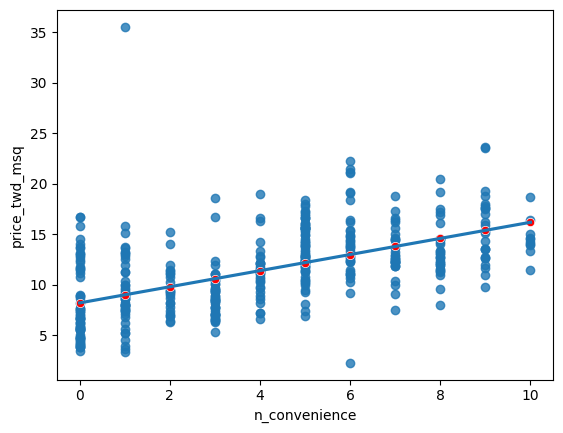

In [14]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# Add a scatter plot layer to the regplot
sns.scatterplot(x='n_convenience', y='price_twd_msq',color="red",data=prediction_data)

# Show the layered plot
plt.show()

In [15]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience":[-1,2.5]})
print(mdl_price_vs_conv.predict(impossible),"These results have nonsense since it is not possible real data")

0     7.426158
1    10.219437
dtype: float64 These results have nonsense since it is not possible real data


## Working with model objects
Ols contains another attributes.   

* fittedvalues is a series of the of predictions on the original dataset.  
* resid are a measure of innacuracy in the model fit. There is one residual for each row of the dataset. They are the data point minus the predicted value. If the model has a good fit, the residuals follow a normal distribution.  
  
The summary method shows a more extended print out of the details of the model.

In [16]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

dist_to_mrt_m
84.87882      16.205035
306.59470     15.406955
561.98450     12.214636
561.98450     12.214636
390.56840     12.214636
                ...    
4082.01500     8.224237
90.45606      15.406955
390.96960     13.810795
104.81010     12.214636
90.45606      15.406955
Length: 414, dtype: float64
dist_to_mrt_m
84.87882     -4.737561
306.59470    -2.638422
561.98450     2.097013
561.98450     4.366302
390.56840     0.826211
                ...   
4082.01500   -3.564631
90.45606     -0.278362
390.96960    -1.526378
104.81010     3.670387
90.45606      3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.41e-37
Time

In [17]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept+slope*explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


## Regression to the mean
Residual exist due to problems in the model and fundamental randomness.  
Extreme cases are often due to randomness.
Regression to the mean means extreme cases don't persist over time.
Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.


NameError: name 'sp500_yearly_returns' is not defined

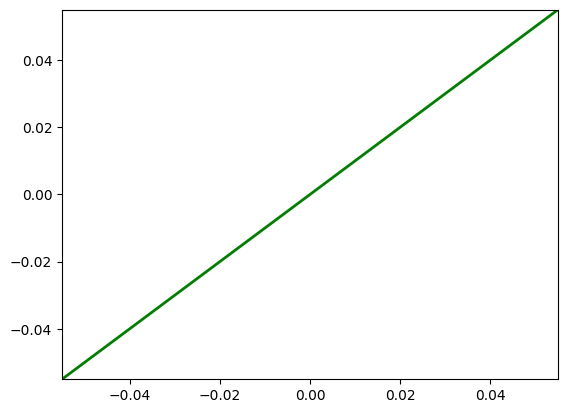

In [ ]:
# Don't run until I find the dataset
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",y="return_2019",data=sp500_yearly_returns,ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

## Transforming variables
Sometimes the relation between the explanatory and responsive variables is not linear.  Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

We'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!  

Notice that we need to call for a new data set.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols 
import numpy as np
import pandas as pd
url= "https://raw.githubusercontent.com/abnr/ml-data/main/taiwan_real_estate2.csv"
taiwan_real_estate=pd.read_csv("real_estate_taiwan.csv",index_col=0) 
taiwan_real_estate.rename(columns={"distance to the nearest MRT station":"dist_to_mrt_m","house price of unit area":"price_twd_msq","number of convenience stores":"n_convenience"},inplace=True)

In [2]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house age      414 non-null    float64
 1   dist_to_mrt_m  414 non-null    float64
 2   n_convenience  414 non-null    int64  
 3   latitude       414 non-null    float64
 4   longitude      414 non-null    float64
 5   price_twd_msq  414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


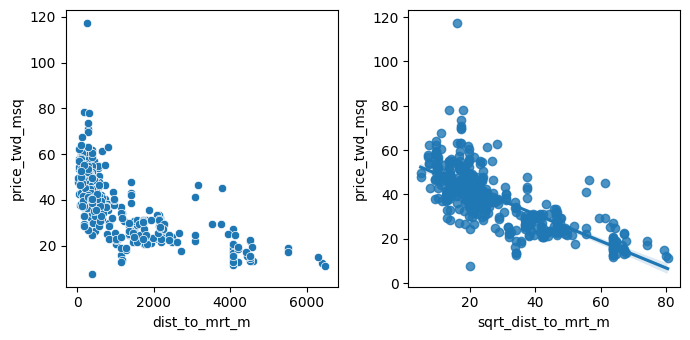

In [4]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax =plt.subplots(1,2)
sns.scatterplot(x="dist_to_mrt_m",y="price_twd_msq",data=taiwan_real_estate,ax=ax[0])
# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m",y="price_twd_msq",data=taiwan_real_estate,ax=ax[1])
plt.show()

In [5]:
# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
print(mdl_price_vs_dist.params)

Intercept             55.225885
sqrt_dist_to_mrt_m    -0.604296
dtype: float64


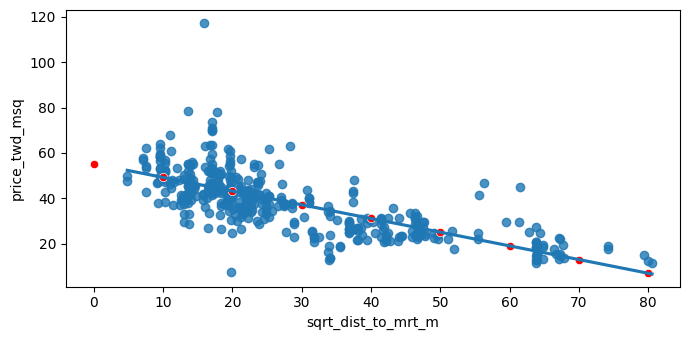

In [6]:
# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

## Quantifying model
The coefficient of determination, sometimes called "r-squared". It is defined as the proportion of the variance in the responsible variable that is predictable frmo the explanatory variable. 1 means a perfect fit whereas 0 is the worst. It can bee seen with the summary() function, or directly with the rsquared attribute.    
Then, the coefficient of determination is the correlation factor squared.  

The second metric we'll look is the residual standard error. MSE is the squared residual standard error. MSE can be retrieved with
the attribute: mse=model.mse_resid. And then rse=np.sqrt(mse_resid). 

## Visualizing model fit
A first diagnostic plot is of residuals vs fitted values.  If residuals met the assumption that they are normally distributed with mean zero, then the trend line should closely follow the y equals zero line on the plot. 
 
The second diagnostic plot is the Q-Q plot. It shows whether or not the residuals follow a normal distribution. On the x-axis, the points are quantiles from the normal distribution. On the y-axis, you get the sample quantiles, which are the quantiles derived from your dataset. It sounds technical, but interpreting this plot is straightforward. If the points track along the straight line, they are normally distributed. If not, they aren't.  

The third plot shows the square root of the standardized residuals versus the fitted values. It's often called a scale-location plot. This plot shows whether the size of the residuals gets bigger or smaller.  

To create the residuals vs. fitted plot, you can use the residplot function from seaborn. It takes the usual x, y, and data arguments, in addition to the lowess argument (lowess=True). This will add a smooth curve following the data, visualizing the trend of your residuals.  

To draw the Q-Q plot we can use the qqplot function from statmodels.api import qqplot. By qqplot(data=model.resid,fit=True,line="45") 
 
For scale-location, requires a bit more preprocessing. You first need to extract the normalized residuals from the model, which you can get by using the get_influence method, then accessing the resid_studentized_internal attribute. You then take the absolute values and take the square root of these normalized residuals to standardize them. Next, you can call sns dot regplot, passing in mdl_bream dot fittedvalues for x, and the standardized residuals for y. Again, you can also include a lowess argument to make interpretation easier.

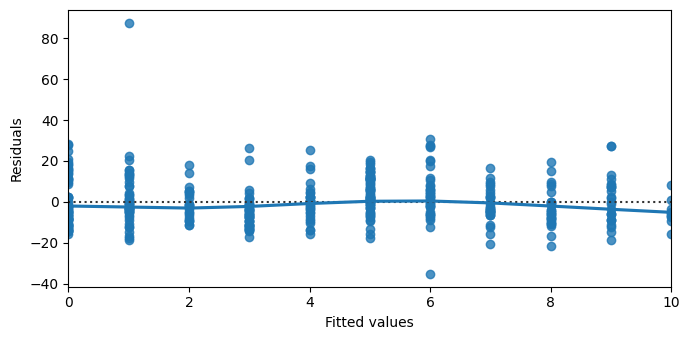

In [ ]:
# Plot the residuals vs. fitted values in Taiwan real state data set
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

In [7]:
#Let us generate again the linear model
# Import the ols function
from statsmodels.formula.api import ols 

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq~n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv =mdl_price_vs_conv.fit()

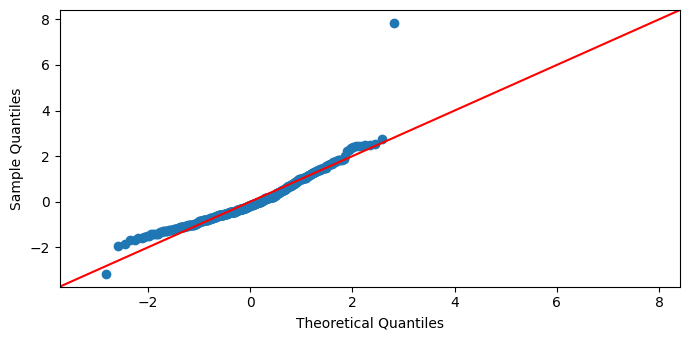

In [10]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

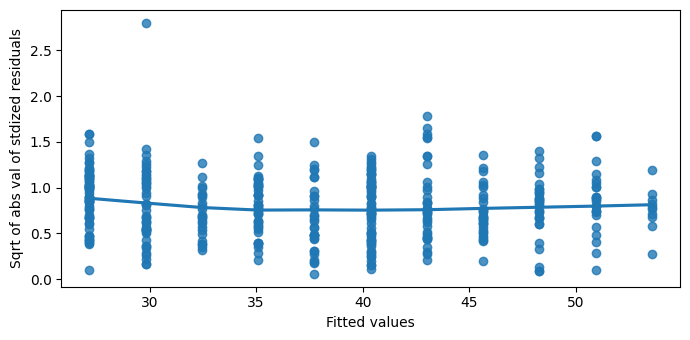

In [8]:
#Create the scale-location plot.
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## Outliers, leverage, and influence 
The technical form for an unusual data point is an outlier.  
The first kind of outlier is when you have explanatory variables that are extreme.  
The other property of outliers is when the point lies a long way from the model predictions.  

Leverage is a mesure of how extreme explanatory variable values are for each observation. Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.  

Influence measures how much the model would change if you left the observation out of the dataset when modeling.  

Leverage and influence can be retrieved from the summary frame.  

model=ols().fit()
summary_roach=model.get_influence().summary_frame()

In [10]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by="leverage",ascending=False).head())

     house age  dist_to_mrt_m  ...  sqrt_dist_to_mrt_m  leverage
No                             ...                              
348       17.4       6488.021  ...           80.548253  0.026665
117       30.9       6396.283  ...           79.976765  0.026135
250       18.0       6306.153  ...           79.411290  0.025617
256       31.5       5512.038  ...           74.243101  0.021142
9         31.7       5512.038  ...           74.243101  0.021142

[5 rows x 8 columns]


In [11]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"]=summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values(by="cooks_dist",ascending=False).head())

     house age  dist_to_mrt_m  ...  leverage  cooks_dist
No                             ...                      
271       10.8       252.5822  ...  0.003849    0.115549
149       16.4      3780.5900  ...  0.012147    0.052440
229       11.9      3171.3290  ...  0.009332    0.035384
221       37.2       186.5101  ...  0.004401    0.025123
114       14.8       393.2606  ...  0.003095    0.022813

[5 rows x 9 columns]


## Why we need logistic regression?


`Logistic` regression is another type of generalized model used when the response variable is logical.  
The responses follow the logistic curve  
$$ f(x)= \frac{1}{1+e^{-x}} $$
To perform a logistic regression

from statsmodels.formula.api import logit
model_logit=logit("y~x",data=).fit()		

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
url_link="https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects/main/churn.csv"
churn=pd.read_csv(url_link)

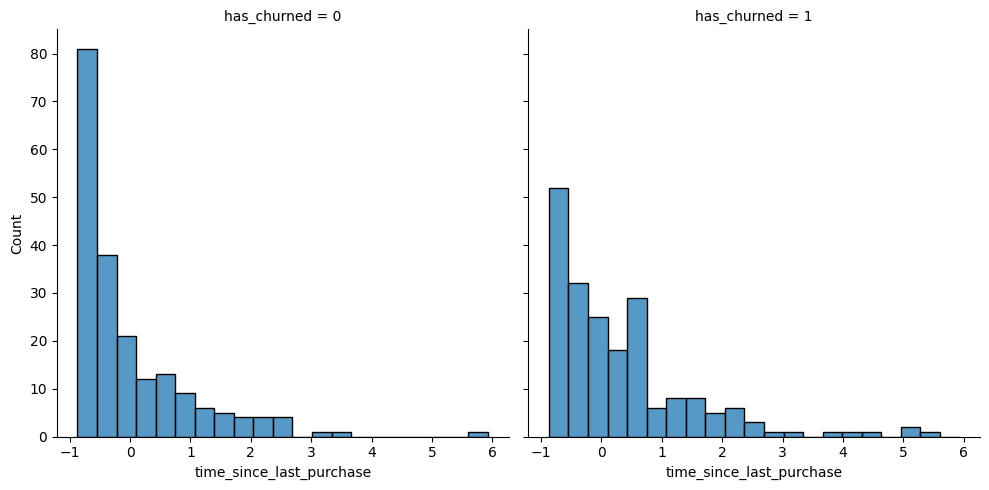

In [7]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x="time_since_last_purchase", col="has_churned",data=churn)

plt.show()

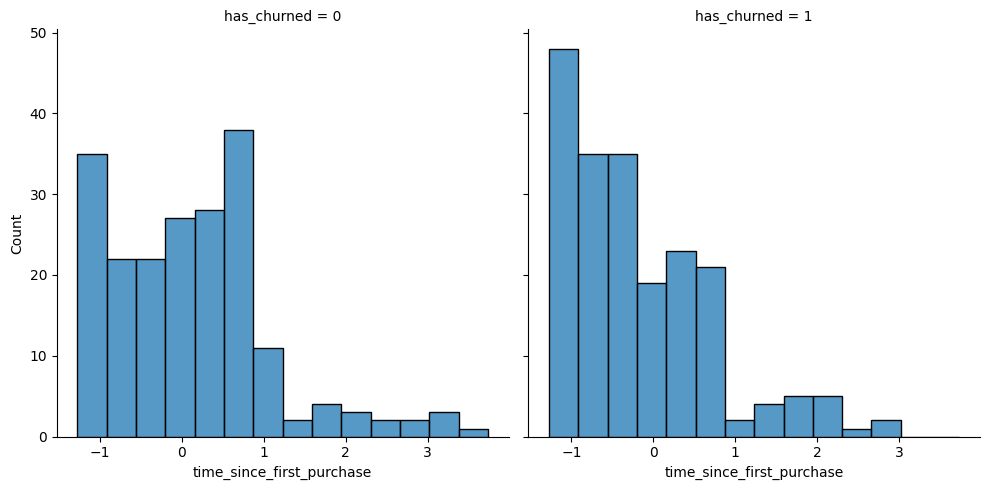

In [8]:
# Redraw the plot with time_since_first_purchase
sns.displot(x="time_since_first_purchase",col="has_churned",data=churn)

plt.show()

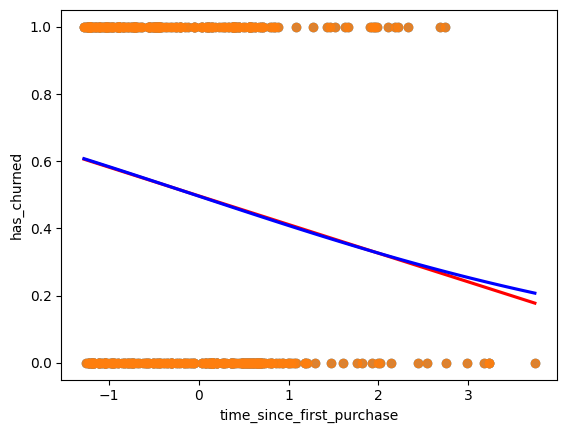

In [3]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

plt.show()

In [8]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned~time_since_first_purchase",data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


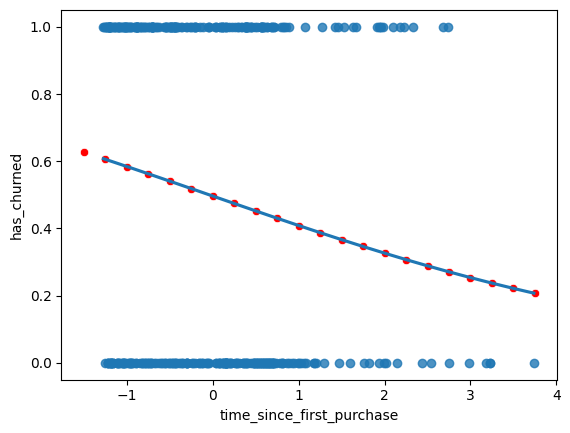

In [32]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(y="has_churned",x="time_since_first_purchase",logistic=True,ci=None,data=churn)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",y="has_churned",data=prediction_data,color="red")

plt.show()

## Predictions and odds ratios
For predictions, we employ the same technique as for linear models. Create a DataFrame of explanatory variable values. Then add a response column calculated using the predict method.   
To get the most likely outcome, beyond 0.5 probability, then we simply round the predicted probabilites with the function np.round().   

The odds ratio is defined as the probability that something happens divided between the probability it does not.  
One nice property of logistic regression odds ratios is that on a log-scale, they change linearly with the explanatory variable.  
This nice property of the logarithm of odds ratios means log-odds ratio is another common way of describing logistic regression predictions. In fact, the log-odds ratio is also known as the logit, hence the name of the function you've been using to model logistic regression. 

In [16]:
explanatory_data=pd.DataFrame({"time_since_first_purchase":np.arange(-1.5,4,0.25)})
prediction_data=explanatory_data.assign(has_churned=mdl_churn_vs_relationship.predict(explanatory_data))
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


In [17]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


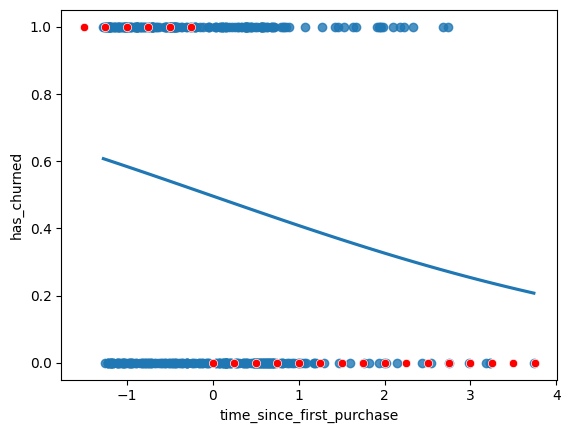

In [18]:
# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(y="most_likely_outcome",x="time_since_first_purchase",data=prediction_data,color="red")

plt.show()

In [19]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"]/(1-prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


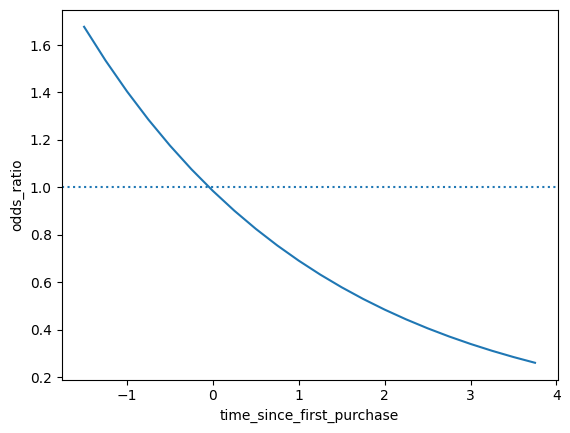

In [20]:
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",y="odds_ratio",data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. 

In [22]:
prediction_data["log_odds_ratio"]=np.log(prediction_data["odds_ratio"])
print(prediction_data.head())

   time_since_first_purchase  has_churned  ...  odds_ratio  log_odds_ratio
0                      -1.50     0.626448  ...    1.677003        0.517008
1                      -1.25     0.605470  ...    1.534661        0.428309
2                      -1.00     0.584096  ...    1.404400        0.339610
3                      -0.75     0.562401  ...    1.285197        0.250912
4                      -0.50     0.540465  ...    1.176111        0.162213

[5 rows x 5 columns]


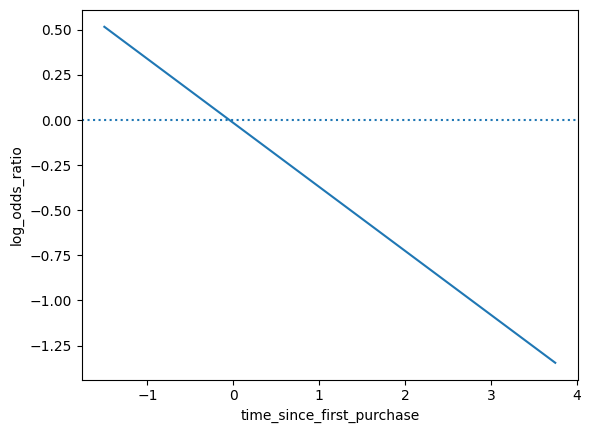

In [23]:
fig = plt.figure()
# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Quantifying logistic regression fit
We will look at confusion matrices to quantify fit.  
We can have four outcomes in a model:  

|                  | **predicted false** | **predicted true** |
|------------------|---------------------|--------------------|
| **actual false** | correct             | false positive     |
| **actual true**  | false negative      | correct            |

The counts of each outcome are called confusion matrix.  

| **true negative**  | **false positive** |
|--------------------|--------------------|
| **false negative** | **true positive**  |

It can be created using the pred_table() method which will return an array. 

conf_matrix=model.pred_table()

The mosaic function from stats.models package lets you easily plot the confusion matrix.  

from statsmodels.graphics.mosaicplot.mosaic import mosaic
mosaic(conf_matrix)

We can also perform the model fit by using performance metrics. 

The first metric is Accuracy which is the proportion of correct predictions.  

The second metric is Sensitivity which is the proportion of true positives (true positives divided by the sum of false negatives and true positives).  

The third metric is Specificity which is the proportion of true negatives (true negatives divided by the sum of true negatives and false positives).

Increasing specificity will decrease sensitivity, or increasing sensitivity will decrease specificity

In [28]:
#Built the confusion matrix manually
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response":actual_response,
                         "predicted_response":predicted_response})

confu_matrix= pd.crosstab(outcomes['actual_response'], outcomes['predicted_response'], rownames=['Actual'], colnames=['Predicted'])

# Print the outcomes
print(outcomes.value_counts(sort = False))
print(confu_matrix)

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64
Predicted  0.0  1.0
Actual             
0          112   88
1           76  124


[[112.  88.]
 [ 76. 124.]]


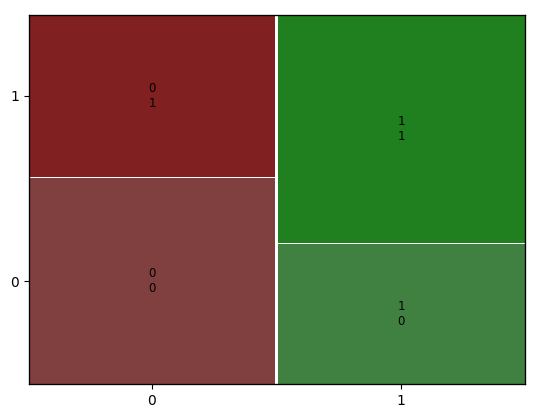

In [30]:
# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [31]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
